In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

import warnings
warnings.filterwarnings('ignore')

In [4]:
Datos =  pd.read_csv('./Mall_Customers.csv') 

In [5]:
Datos.head(40)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [6]:
Datos.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


2. Proprocesar los datos limpiandolos.tratando valores faltantes y transformandolos segun sea necesario

Text(0.5, 1.0, 'Identificacion de datos faltantes y atipicos')

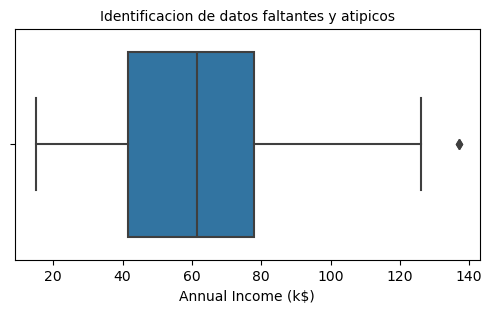

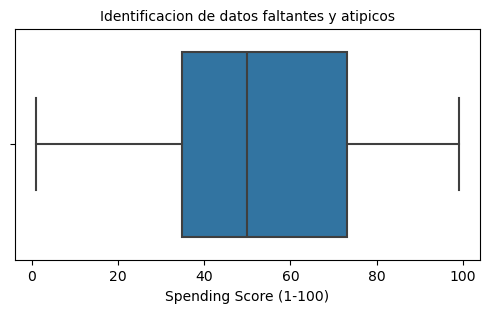

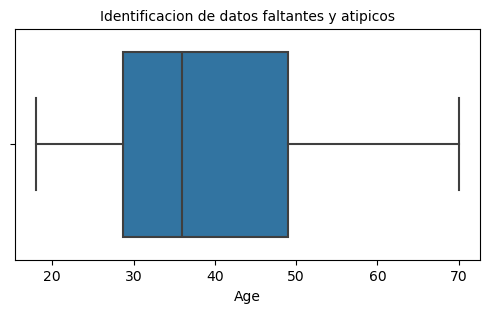

In [20]:
plt.figure(figsize=(6,3)) 
sns.boxplot(x=Datos['Annual Income (k$)'])
plt.title('Identificacion de datos faltantes y atipicos',fontsize=10)
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['Spending Score (1-100)'])
plt.title('Identificacion de datos faltantes y atipicos',fontsize=10)
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['Age'])
plt.title('Identificacion de datos faltantes y atipicos',fontsize=10)


In [21]:
print("Cantidad de Registros con cero en Edad: ",Datos['Age'].isin([0]).sum())
print("Cantidad de Registros con cero en Edad: ",Datos['Gender'].isin([0]).sum())
print("Cantidad de Registros con cero en Edad: ",Datos['Annual Income (k$)'].isin([0]).sum())
print("Cantidad de Registros con cero en Edad: ",Datos['Spending Score (1-100)'].isin([0]).sum())


Cantidad de Registros con cero en Edad:  0
Cantidad de Registros con cero en Edad:  0
Cantidad de Registros con cero en Edad:  0
Cantidad de Registros con cero en Edad:  0


NO SE PRESENTAN DATOS ATIPICOS

3. Seleccionar las caracteristicas más relevantes para entrenar el modelo utilizando selección de caracteristicas
Variables de interes:
* Annual Income
* Spending Score

In [25]:
Datos = Datos [["Age","Annual Income (k$)","Spending Score (1-100)"]]

In [26]:
Datos.head(10)

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
5,22,17,76
6,35,18,6
7,23,18,94
8,64,19,3
9,30,19,72


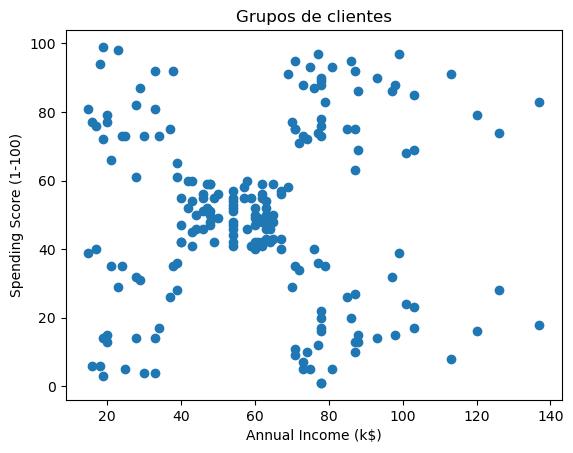

In [27]:
plt.scatter(Datos['Annual Income (k$)'],Datos['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Grupos de clientes')
plt.show()

4. Entrenar el modelo configurando los diferentes hiperparametros

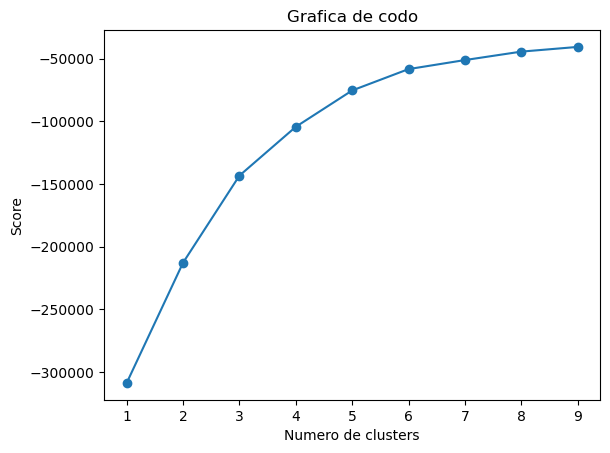

In [30]:
Nc = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(Datos).score(Datos) for i in range(len(kmeans))]
score
plt.plot(Nc,score,marker='o')
plt.xlabel('Numero de clusters')
plt.ylabel('Score')
plt.title('Grafica de codo')
plt.show()


In [56]:
Modelo = KMeans(n_clusters=6,random_state=0)
Modelo.fit(Datos)

KMeans(n_clusters=6, random_state=0)

In [57]:
Modelo.labels_
Datos["Grupo"] = Modelo.labels_
print(Datos)

     Age  Annual Income (k$)  Spending Score (1-100)  Grupo
0     19                  15                      39      5
1     21                  15                      81      3
2     20                  16                       6      5
3     23                  16                      77      3
4     31                  17                      40      5
..   ...                 ...                     ...    ...
195   35                 120                      79      1
196   45                 126                      28      0
197   32                 126                      74      1
198   32                 137                      18      0
199   30                 137                      83      1

[200 rows x 4 columns]


5. Evaluar el desempeño del modelo con metricas como Coeficiente de Silhouette, Indice de Calinski

In [58]:
Observaciones = len(Datos)
X = Datos.drop('Grupo', axis=1)
clusters = Datos['Grupo']

sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

table_data = [
    ["Numero de observaciones", Observaciones],
    ["Coeficiente de Silhoutte",sil_score],
    ["Indice de Calinski Harabasz", calinski_score],
    ["Indice Davies Bouldin", davies_score],
]

from tabulate import tabulate
print(tabulate(table_data,headers=["Metric","Value"], tablefmt = 'pretty'))

+-----------------------------+--------------------+
|           Metric            |       Value        |
+-----------------------------+--------------------+
|   Numero de observaciones   |        200         |
|  Coeficiente de Silhoutte   | 0.4523566166018854 |
| Indice de Calinski Harabasz | 166.71357349776875 |
|    Indice Davies Bouldin    | 0.7443002999569567 |
+-----------------------------+--------------------+


6. Realizar graficas 

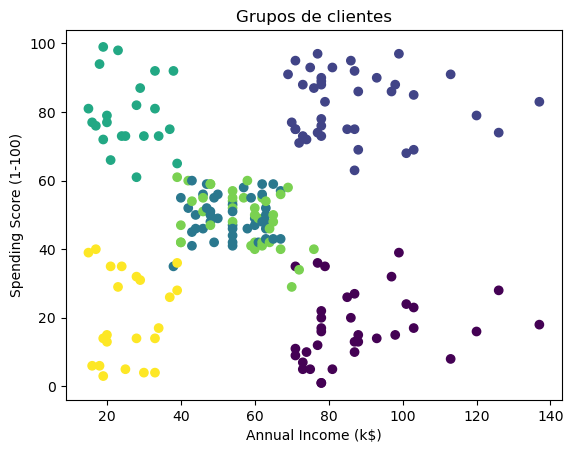

In [59]:
plt.scatter(Datos['Annual Income (k$)'],Datos['Spending Score (1-100)'],c=Datos['Grupo'],cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Grupos de clientes')
plt.show()

7. Interpretacion de resultados 

Del desempeño del modelo se puede describir: 

* Coeficiente de Silhoutte : El coeficiente es de 0.45 lo que indica que hay una buena cantidad de separacion entre los grupos. Los grupos son algo distintos pero se encuentran superposiciones entre ellos. 

* Indice de Calinski - Harabasz : El indice resultante es 166.72 lo que indica que los cluster no estan bien definidos. 

* Indice Davies Bouldin: Un alto valor en este indice, indica que hay una superposicion entre algunos cluster, lo que significa que algunso cluster son similares y no hay mucha separacion entre los grupos. 